In [ ]:
import os
import json
import cv2
import librosa
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from warnings import filterwarnings

filterwarnings(action='ignore')

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"prachi2710","key":"e4aed592cb9d12bff118d6033031f036"}'}

In [ ]:
!kaggle datasets download -d soumendraprasad/sound-of-114-species-of-birds-till-2022

Dataset URL: https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022
License(s): CC0-1.0
sound-of-114-species-of-birds-till-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip sound-of-114-species-of-birds-till-2022.zip -d birds_dataset/

Archive:  sound-of-114-species-of-birds-till-2022.zip
  inflating: birds_dataset/Birds Voice.csv  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan11.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan13.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan14.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan15.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan16.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan17.mp3  
  inflating: birds_dataset/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan18.mp3  
  inflating: birds_dataset/Voice of Birds/Voic

In [ ]:
# Convert the mp3 Audio into Tensors

def audio_to_tensors(audio_file):
    # Extract the Signal and Sample_Rate from Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    return mfccs_tensors

In [ ]:
# Sample Audio
audio_sample = '/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3'
audio_to_tensors(audio_sample)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-302.7308    ,   70.47813   ,   13.989463  ,   28.275862  ,
          9.768283  ,    7.4185357 ,    3.6636062 ,   12.622561  ,
          0.9152409 ,    3.1517699 ,    4.532145  ,    6.7180843 ,
         -2.0768957 ,    5.589432  ,    3.097847  ,    1.8796207 ,
         -0.49634987,    6.4944406 ,    2.0897276 ,    4.1464815 ,
          2.3515277 ,    7.5341434 ,    0.6378776 ,    5.8427997 ,
          4.5193014 ,    5.5878024 ,    1.6145757 ,    6.6874557 ,
          2.1035838 ,    4.21776   ,    2.5508912 ,    4.6314435 ,
          0.40562916,    4.0922813 ,    1.5406471 ,    3.7211802 ,
          0.51732594,    3.6272905 ,    0.5613322 ,    3.1007853 ],
      dtype=float32)>

In [ ]:
# Extract the Features from Audio Files

# Audio Directory Path
directory = '/content/Voice of Birds/Voice of Birds'

extracted_features = []

# Count the total number of files
total_files = sum(len(files) for _, _, files in os.walk(directory))

# Initialize tqdm with the total number of files
with tqdm(total=total_files, desc='Processing files') as pbar:

  for target_class in os.listdir(directory):                               # List of All Target Folder Names in Directory

      target_class_path = os.path.join(directory, target_class)            # Make a Target Folder Path in Directory

      for audio_file in os.listdir(target_class_path):                     # List of All Audio Files in Target Folder

          audio_path = os.path.join(directory, target_class, audio_file)   # Make a Audio File Path from Target Folder in Directory

          features = audio_to_tensors(audio_path)                          # Extract the Features from the Audio File

          extracted_features.append([features, target_class])              # Append the Features and Target_Class in List

          pbar.update(1)                                                   # Update the progress bar for each file processed


Processing files: 100%|██████████| 2161/2161 [05:02<00:00,  7.14it/s]


In [ ]:
extracted_features[0]

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-206.01665   ,   24.082926  ,  -76.88311   ,   -7.0570307 ,
         -16.718462  ,   22.979527  ,    0.36279264,    1.5176032 ,
          -1.1458284 ,   -2.8719602 ,    1.3485454 ,   -0.34269235,
          -4.460924  ,    9.045867  ,   -0.6409125 ,   -1.4948305 ,
          -1.935515  ,    4.202584  ,    0.61565995,   -0.7559198 ,
          -2.627185  ,    6.316041  ,    3.3211162 ,    3.8096428 ,
          -6.0193644 ,    0.32628486,    3.8977041 ,    3.1586998 ,
          -6.6486087 ,    1.7692192 ,    4.070515  ,   -0.4203913 ,
          -5.9703827 ,    4.5586967 ,   -0.8513139 ,   -1.8520733 ,
          -1.1217775 ,    1.8943795 ,   -3.6759605 ,    0.7599756 ],
       dtype=float32)>,
 'Cauca Guan_sound']

In [ ]:
# Creating DataFrame from Extracted Features with Class Labels

features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
features_df

,features,class
0,"(tf.Tensor(-206.01665, shape=(), dtype=float32...",Cauca Guan_sound
1,"(tf.Tensor(-164.83673, shape=(), dtype=float32...",Cauca Guan_sound
2,"(tf.Tensor(-233.52887, shape=(), dtype=float32...",Cauca Guan_sound
3,"(tf.Tensor(-342.49777, shape=(), dtype=float32...",Cauca Guan_sound
4,"(tf.Tensor(-263.95724, shape=(), dtype=float32...",Cauca Guan_sound
...,...,...
2156,"(tf.Tensor(-377.67938, shape=(), dtype=float32...",Rufous-bellied Chachalaca_sound
2157,"(tf.Tensor(-475.44897, shape=(), dtype=float32...",Rufous-bellied Chachalaca_sound
2158,"(tf.Tensor(-271.44492, shape=(), dtype=float32...",Rufous-bellied Chachalaca_sound
2159,"(tf.Tensor(-341.3743, shape=(), dtype=float32)...",Rufous-bellied Chachalaca_sound


In [ ]:
# Encoding Class Labels using LabelEncoder

target_encoding = LabelEncoder().fit_transform(features_df['class'])
target_encoding

array([19, 19, 19, ..., 78, 78, 78])

In [ ]:
# Adding Encoded Class Labels Column to DataFrame

features_df['target'] = target_encoding.tolist()
features_df

,features,class,target
0,"(tf.Tensor(-206.01665, shape=(), dtype=float32...",Cauca Guan_sound,19
1,"(tf.Tensor(-164.83673, shape=(), dtype=float32...",Cauca Guan_sound,19
2,"(tf.Tensor(-233.52887, shape=(), dtype=float32...",Cauca Guan_sound,19
3,"(tf.Tensor(-342.49777, shape=(), dtype=float32...",Cauca Guan_sound,19
4,"(tf.Tensor(-263.95724, shape=(), dtype=float32...",Cauca Guan_sound,19
...,...,...,...
2156,"(tf.Tensor(-377.67938, shape=(), dtype=float32...",Rufous-bellied Chachalaca_sound,78
2157,"(tf.Tensor(-475.44897, shape=(), dtype=float32...",Rufous-bellied Chachalaca_sound,78
2158,"(tf.Tensor(-271.44492, shape=(), dtype=float32...",Rufous-bellied Chachalaca_sound,78
2159,"(tf.Tensor(-341.3743, shape=(), dtype=float32)...",Rufous-bellied Chachalaca_sound,78


In [ ]:
# Creating a Dictionary based on Class and Target columns for Future Prediction

prediction_dict = features_df.set_index('target')['class'].to_dict()
prediction_dict

{19: 'Cauca Guan_sound',
 25: 'Choco Tinamou_sound',
 98: 'Tepui Tinamou_sound',
 60: 'New Guinea Scrubfowl_sound',
 55: 'Malleefowl_sound',
 76: 'Red-throated Piping Guan_sound',
 68: 'Patagonian Tinamou_sound',
 99: 'Thicket Tinamou_sound',
 61: 'Nicobar Megapode_sound',
 71: 'Puna Tinamou_sound',
 28: 'Colombian Chachalaca_sound',
 22: 'Chestnut-headed Chachalaca_sound',
 16: 'Brown Tinamou_sound',
 64: 'Okarito Kiwi_sound',
 1: 'Andean Tinamou_sound',
 37: 'East Brazilian Chachalaca_sound',
 51: 'Little Chachalaca_sound',
 57: 'Melanesian Megapode_sound',
 81: 'Rusty Tinamou_sound',
 83: 'Scaled Chachalaca_sound',
 89: 'Southern Cassowary_sound',
 70: 'Plain Chachalaca_sound',
 95: 'Tanimbar Megapode_sound',
 48: 'Huayco Tinamou_sound',
 38: 'Elegant Crested Tinamou_sound',
 92: 'Spotted Nothura_sound',
 56: 'Marail Guan_sound',
 102: 'Undulated Tinamou_sound',
 43: 'Grey Tinamou_sound',
 58: 'Micronesian Megapode_sound',
 50: 'Lesser Rhea_sound',
 24: 'Chilean Tinamou_sound',
 96:

In [ ]:
# Save to JSON File

with open(file='/content/prediction.json', mode='w') as f:
    json.dump(prediction_dict, f)

In [ ]:
# Read the Prediction_Dictionary File

with open(file='/content/prediction.json', mode='r') as f:
    prediction_dict = json.load(f)
prediction_dict

{'19': 'Cauca Guan_sound',
 '25': 'Choco Tinamou_sound',
 '98': 'Tepui Tinamou_sound',
 '60': 'New Guinea Scrubfowl_sound',
 '55': 'Malleefowl_sound',
 '76': 'Red-throated Piping Guan_sound',
 '68': 'Patagonian Tinamou_sound',
 '99': 'Thicket Tinamou_sound',
 '61': 'Nicobar Megapode_sound',
 '71': 'Puna Tinamou_sound',
 '28': 'Colombian Chachalaca_sound',
 '22': 'Chestnut-headed Chachalaca_sound',
 '16': 'Brown Tinamou_sound',
 '64': 'Okarito Kiwi_sound',
 '1': 'Andean Tinamou_sound',
 '37': 'East Brazilian Chachalaca_sound',
 '51': 'Little Chachalaca_sound',
 '57': 'Melanesian Megapode_sound',
 '81': 'Rusty Tinamou_sound',
 '83': 'Scaled Chachalaca_sound',
 '89': 'Southern Cassowary_sound',
 '70': 'Plain Chachalaca_sound',
 '95': 'Tanimbar Megapode_sound',
 '48': 'Huayco Tinamou_sound',
 '38': 'Elegant Crested Tinamou_sound',
 '92': 'Spotted Nothura_sound',
 '56': 'Marail Guan_sound',
 '102': 'Undulated Tinamou_sound',
 '43': 'Grey Tinamou_sound',
 '58': 'Micronesian Megapode_sound',


In [ ]:
# Converting Features into List
features = features_df['features'].tolist()
features

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-206.01665   ,   24.082926  ,  -76.88311   ,   -7.0570307 ,
         -16.718462  ,   22.979527  ,    0.36279264,    1.5176032 ,
          -1.1458284 ,   -2.8719602 ,    1.3485454 ,   -0.34269235,
          -4.460924  ,    9.045867  ,   -0.6409125 ,   -1.4948305 ,
          -1.935515  ,    4.202584  ,    0.61565995,   -0.7559198 ,
          -2.627185  ,    6.316041  ,    3.3211162 ,    3.8096428 ,
          -6.0193644 ,    0.32628486,    3.8977041 ,    3.1586998 ,
          -6.6486087 ,    1.7692192 ,    4.070515  ,   -0.4203913 ,
          -5.9703827 ,    4.5586967 ,   -0.8513139 ,   -1.8520733 ,
          -1.1217775 ,    1.8943795 ,   -3.6759605 ,    0.7599756 ],
       dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-1.6483673e+02,  4.3680149e+01, -3.2542789e+01,  8.1551666e+00,
        -1.0418864e+01,  1.8347988e+01,  2.6886160e+01,  6.6946821e+00,
         3.4671049e+00,  1.2902975e+01,  3.0079393e+00,

In [ ]:
# Converting Targets into Lists
target = features_df['target'].tolist()
print(target)

[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 25, 25, 25, 25, 25, 25, 25, 98, 98, 60, 60, 60, 60, 60, 60, 55, 55, 55, 55, 55, 55, 55, 55, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 68, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 61, 61, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 22, 22, 22, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 64, 64, 64, 64, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 5

In [ ]:
# Converting Features and Targets to TensorFlow Tensors
features_tensor = tf.convert_to_tensor(features)
target_tensor = tf.convert_to_tensor(target)

In [ ]:
target_tensor

<tf.Tensor: shape=(2161,), dtype=int32, numpy=array([19, 19, 19, ..., 78, 78, 78], dtype=int32)>

In [ ]:
# Creating TensorFlow Dataset from Tensors
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
# Split the dataset into batches
batch_size = 32
dataset = dataset.batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 68
    train_batch_count = int(dataset_batch_count * train_size)                           # int(68*0.8) ---> 54 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(68*0.1) ---> 6 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 54 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 14 Batches ---> Next 6 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 8 Batches are Testing

    return train_ds, validation_ds, test_ds

In [ ]:
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

(40,)
[-3.5061505e+02  8.4287148e+01 -1.3919255e+02 -1.2270684e+02
 -6.0329857e+00 -1.5096572e+01 -1.2845188e+01  2.9582781e+01
 -1.1777932e+01  1.0819895e+01 -3.0566428e+00  1.2271064e+01
 -7.0586166e+00  8.8596144e+00  4.1784654e+00  5.5117736e+00
  5.9202260e-01  2.4668136e+00 -5.6176906e+00 -2.5919309e+00
 -1.6760899e+00 -9.0587199e-01  4.6302089e-01 -4.2356358e+00
  4.7877049e+00 -8.2203112e+00  6.5587273e+00 -5.5703626e+00
  4.4722300e+00 -2.5236974e+00  2.0173798e+00  1.9566872e+00
 -1.0404601e+00  2.7728376e+00 -1.9903536e+00  1.5898000e+00
 -2.0874004e+00  1.8427598e+00 -1.8090053e-01 -7.4871069e-01]

(32,)
12



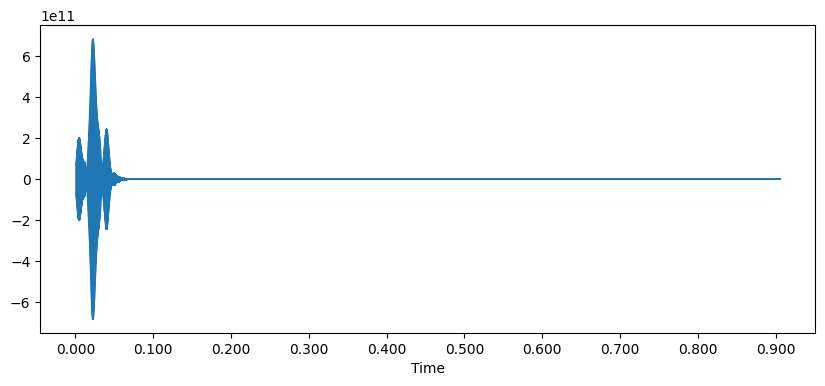

In [ ]:
# Visualize the Image and Label Batches from TensorFlow Dataset

for audio_batch, label_batch in train_ds.take(1):
    print(audio_batch.numpy()[0].shape)
    print(audio_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    audio = librosa.feature.inverse.mfcc_to_audio(audio_batch.numpy())

    # Plot the reconstructed audio waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio)
    plt.show()

In [ ]:
# Overview of Training Dataset Structure and Specifications
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Define the Parameters of Input_shape, Channel and Target

mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 114          # Output Classes

input_shape = (mfcc_features, channel)
input_shape

(40, 1)

In [ ]:
# Build a CNN Model Architecture

model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=input_shape),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

<Sequential name=sequential, built=True>

In [ ]:
# Display the Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 38, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 9, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 7, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 114)            │        58,482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,144,434 (4.37 MB)

 Trainable params: 1,143,154 (4.36 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [ ]:
# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=250,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.0060 - loss: 17.4871 - val_accuracy: 0.0625 - val_loss: 16.6979
Epoch 2/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.0091 - loss: 17.3328 - val_accuracy: 0.0000e+00 - val_loss: 16.6559
Epoch 3/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0152 - loss: 16.9474 - val_accuracy: 0.0000e+00 - val_loss: 16.6149
Epoch 4/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.0220 - loss: 16.8206 - val_accuracy: 0.0573 - val_loss: 16.5729
Epoch 5/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0240 - loss: 16.6257 - val_accuracy: 0.0573 - val_loss: 16.5112
Epoch 6/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0203 - loss: 16.5711 - val_accuracy: 0.0573 - val_loss: 16.4537
Epoch 7/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0436 - loss: 16.4051 - val_accuracy: 0.0573 - val_loss: 16.3771
Epoch 8/250
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.0323 - loss: 16.

In [ ]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9266 - loss: 6.6526


[6.607578754425049, 0.9375]

In [ ]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 250, 'steps': 54}

In [ ]:
# Accessing Keys of Training History
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
len(acc), len(val_acc), len(loss), len(val_loss)

(250, 250, 250, 250)

In [ ]:
# Save the Model
model.save('/content/model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

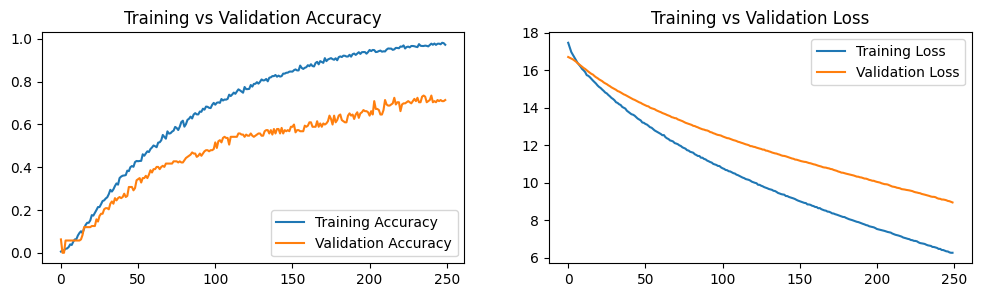

In [ ]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [ ]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9506 - loss: 6.4832


[6.607579231262207, 0.9375]

In [ ]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 250, 'steps': 54}

In [ ]:
# Accessing Keys of Training History
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
len(acc), len(val_acc), len(loss), len(val_loss)

(250, 250, 250, 250)

In [ ]:
# Save the Model
model.save('/content/model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

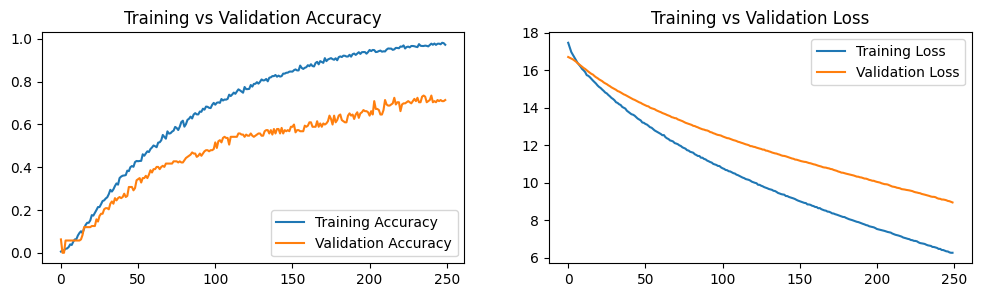

In [ ]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [ ]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>